## 各分词工具比较

## NLPIR

In [4]:
import pynlpir

# 打开分词器
pynlpir.open()


# 读取文件内容
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read().strip()


# 分词函数
def segment_text(text):
    segments = pynlpir.segment(text, pos_tagging=False)
    words = []

    for segment in segments:
        if isinstance(segment, tuple):
            word, _ = segment  # 解包元组，只提取词
            words.append(word)
        elif isinstance(segment, str):
            words.append(segment)  # 直接添加字符串
        else:
            print(f"Unexpected segment format: {segment}")  # 记录其他格式
    return words


# 计算评价指标
def calculate_metrics(gold_segments, predicted_segments):
    gold_set = set(gold_segments)
    predicted_set = set(predicted_segments)

    TP = len(gold_set.intersection(predicted_set))  # True Positives
    FP = len(predicted_set - gold_set)  # False Positives
    FN = len(gold_set - predicted_set)  # False Negatives

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1


# 主函数
def main(unsegmented_file, segmented_file):
    unsegmented_text = read_file(unsegmented_file)
    gold_text = read_file(segmented_file)

    predicted_segments = segment_text(unsegmented_text)
    gold_segments = gold_text.split()  # 假设已分词的文件以空格分隔

    precision, recall, f1 = calculate_metrics(gold_segments, predicted_segments)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


# 示例调用
# 请将以下路径替换为你的文件路径
unsegmented_file = '../data/separate/msr_test.utf8'
segmented_file = '../data/separate/msr_test_gold.utf8'

# 运行主函数
main(unsegmented_file, segmented_file)

# 关闭分词器
pynlpir.close()

Precision: 0.7570
Recall: 0.7572
F1 Score: 0.7571


## LTP

In [9]:
from ltp import LTP

# 初始化 LTP
ltp = LTP("LTP/small")  # 加载 Small 模型


# 读取文件内容
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read().strip()


# 分词函数
def segment_text(text):
    output = ltp.pipeline([text], tasks=["cws"])  # 分词，返回结果
    return output.cws[0]  # 返回第一个元素，即分词结果


# 计算评价指标
def calculate_metrics(gold_segments, predicted_segments):
    gold_set = set(gold_segments)
    predicted_set = set(predicted_segments)

    TP = len(gold_set.intersection(predicted_set))  # True Positives
    FP = len(predicted_set - gold_set)  # False Positives
    FN = len(gold_set - predicted_set)  # False Negatives

    # print(TP, FP, FN)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1


# 主函数
def main(unsegmented_file, segmented_file):
    unsegmented_text = read_file(unsegmented_file)
    gold_text = read_file(segmented_file)

    predicted_segments = segment_text(unsegmented_text)
    gold_segments = gold_text.split()  # 假设已分词的文件以空格分隔

    precision, recall, f1 = calculate_metrics(gold_segments, predicted_segments)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


# 示例调用
# 请将以下路径替换为你的文件路径
unsegmented_file = '../data/separate/msr_test.utf8'
segmented_file = '../data/separate/msr_test_gold.utf8'

# 运行主函数
main(unsegmented_file, segmented_file)

# 关闭 LTP
# ltp.release()  # 释放模型资源


168 17 12755
Precision: 0.9081
Recall: 0.0130
F1 Score: 0.0256


## SpaCy

In [10]:
import spacy

# 加载中文模型
nlp = spacy.load("zh_core_web_sm")


# 读取文件内容
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read().strip()


# 分词函数
def segment_text(text):
    doc = nlp(text)  # 使用 SpaCy 处理文本
    return [token.text for token in doc]  # 提取分词结果


# 计算评价指标
def calculate_metrics(gold_segments, predicted_segments):
    gold_set = set(gold_segments)
    predicted_set = set(predicted_segments)

    TP = len(gold_set.intersection(predicted_set))  # True Positives
    FP = len(predicted_set - gold_set)  # False Positives
    FN = len(gold_set - predicted_set)  # False Negatives

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1


# 主函数
def main(unsegmented_file, segmented_file):
    unsegmented_text = read_file(unsegmented_file)
    gold_text = read_file(segmented_file)

    predicted_segments = segment_text(unsegmented_text)
    gold_segments = gold_text.split()  # 假设已分词的文件以空格分隔

    precision, recall, f1 = calculate_metrics(gold_segments, predicted_segments)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


# 示例调用
# 请将以下路径替换为你的文件路径
unsegmented_file = '../data/separate/msr_test.utf8'
segmented_file = '../data/separate/msr_test_gold.utf8'

# 运行主函数
main(unsegmented_file, segmented_file)


Precision: 0.7000
Recall: 0.7306
F1 Score: 0.7149


## 合并

C:\cc\code\python\CompKey\.venv\Lib\site-packages\ltp\nerual.py:552: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_file, map_location=map_locat

  Tokenizer  Precision    Recall  F1 Score
0   PyNLPIR   0.757121  0.756945  0.757033
1       LTP   0.908108  0.013000  0.025633
2     SpaCy   0.699956  0.730558  0.714929


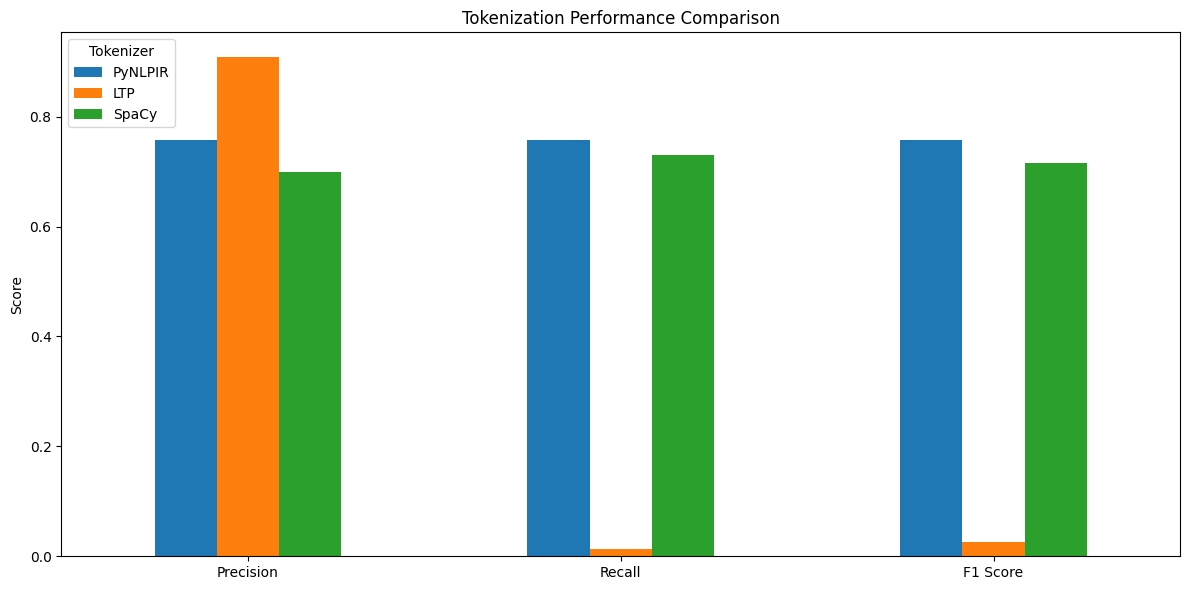

In [16]:
import pynlpir
from ltp import LTP
# from pyhanlp import *
import spacy
import pandas as pd
import matplotlib.pyplot as plt


# 定义分词工具类
class Tokenizer:
    def segment(self, text):
        raise NotImplementedError


class PyNLPIRTokenizer(Tokenizer):
    def __init__(self):
        pynlpir.open()

    def segment(self, text):
        segments = pynlpir.segment(text, pos_tagging=False)
        words = [segment[0] if isinstance(segment, tuple) else segment for segment in segments]
        return words

    def close(self):
        pynlpir.close()


class LTPTokenizer(Tokenizer):
    def __init__(self):
        self.ltp = LTP("LTP/small")

    def segment(self, text):
        output = self.ltp.pipeline([text], tasks=["cws"])
        return output.cws[0]

    def close(self):
        self.ltp.release()


class SpaCyTokenizer(Tokenizer):
    def __init__(self):
        self.nlp = spacy.load("zh_core_web_sm")

    def segment(self, text):
        doc = self.nlp(text)
        return [token.text for token in doc]


# 计算评价指标
def calculate_metrics(gold_segments, predicted_segments):
    gold_set = set(gold_segments)
    predicted_set = set(predicted_segments)

    TP = len(gold_set.intersection(predicted_set))  # True Positives
    FP = len(predicted_set - gold_set)  # False Positives
    FN = len(gold_set - predicted_set)  # False Negatives

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1


# 主函数
def main(unsegmented_file, segmented_file):
    unsegmented_text = read_file(unsegmented_file)
    gold_text = read_file(segmented_file)
    gold_segments = gold_text.split()  # 假设已分词的文件以空格分隔

    tokenizers = {
        "PyNLPIR": PyNLPIRTokenizer(),
        "LTP": LTPTokenizer(),
        "SpaCy": SpaCyTokenizer()
    }

    results = []

    for name, tokenizer in tokenizers.items():
        predicted_segments = tokenizer.segment(unsegmented_text)
        precision, recall, f1 = calculate_metrics(gold_segments, predicted_segments)
        results.append({
            "Tokenizer": name,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

    # # 关闭所有分词器
    # for tokenizer in tokenizers.values():
    #     tokenizer.close()

    # 创建 DataFrame
    df = pd.DataFrame(results)
    print(df)

    # 设置索引为 Tokenizer
    df.set_index('Tokenizer', inplace=True)

    # 转置 DataFrame 以便于绘图
    df_transposed = df.T

    # 可视化
    df_transposed.plot(kind='bar', figsize=(12, 6))

    # 添加标题和标签
    plt.title('Tokenization Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(title='Tokenizer', loc='upper left')
    plt.tight_layout()
    plt.show()


# 读取文件内容
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read().strip()


# 示例调用
unsegmented_file = '../data/separate/msr_test.utf8'
segmented_file = '../data/separate/msr_test_gold.utf8'

# 运行主函数
main(unsegmented_file, segmented_file)
